In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
from joblib import load , dump
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [3]:
df = pd.read_csv('../Dataset/tips.csv')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
print("Gender Counts:")
print(df['sex'].value_counts())
print("\nSmoker Counts:")
print(df['smoker'].value_counts())
print("\nDay Counts:")
print(df['day'].value_counts())
print("\nMeal time Counts:")
print(df['time'].value_counts())

Gender Counts:
sex
Male      157
Female     87
Name: count, dtype: int64

Smoker Counts:
smoker
No     151
Yes     93
Name: count, dtype: int64

Day Counts:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Meal time Counts:
time
Dinner    176
Lunch      68
Name: count, dtype: int64


[]

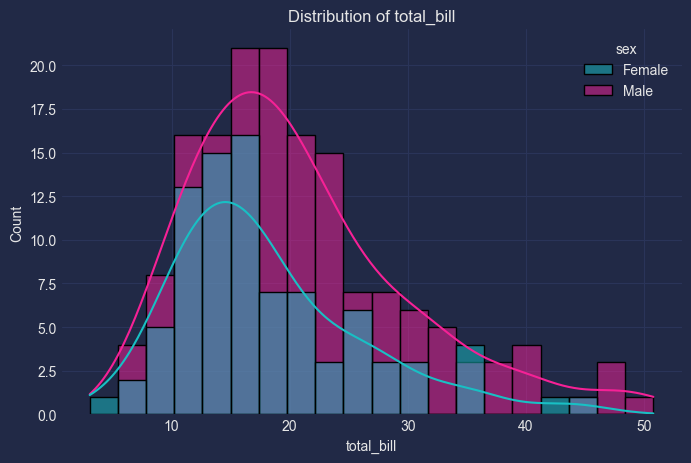

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df, x = 'total_bill', kde = True, bins = 20, hue = 'sex')
plt.title("Distribution of total_bill")
plt.plot()

[]

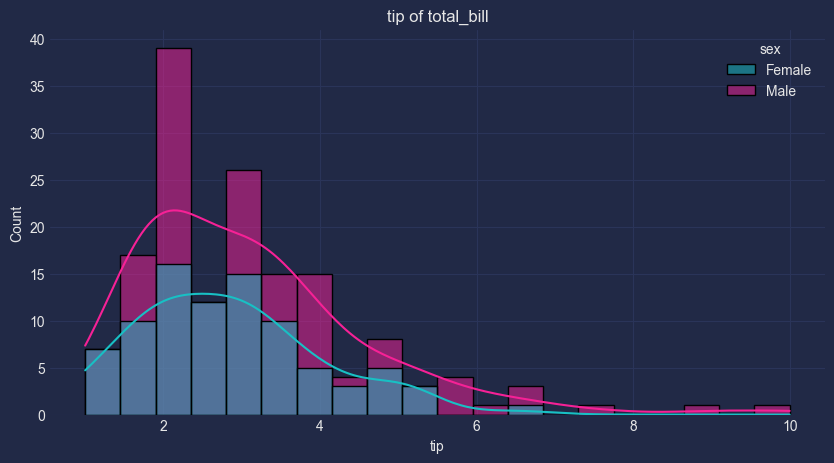

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df, x = 'tip', kde = True, bins = 20, hue = 'sex')
plt.title("tip of total_bill")
plt.plot()

[]

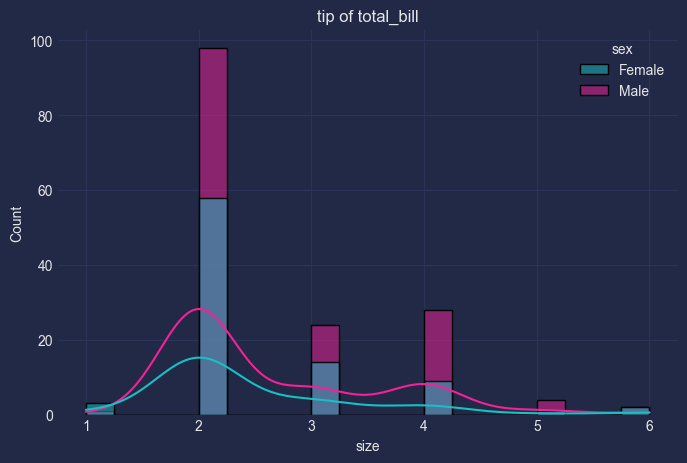

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df, x = 'size', kde = True, bins = 20, hue = 'sex')
plt.title("tip of total_bill")
plt.plot()

[]

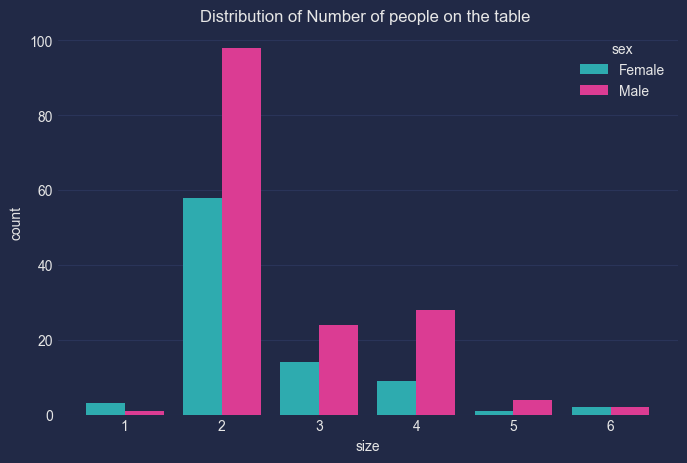

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df, x = 'size', hue = 'sex')
plt.title("Distribution of Number of people on the table ")
plt.plot()

[]

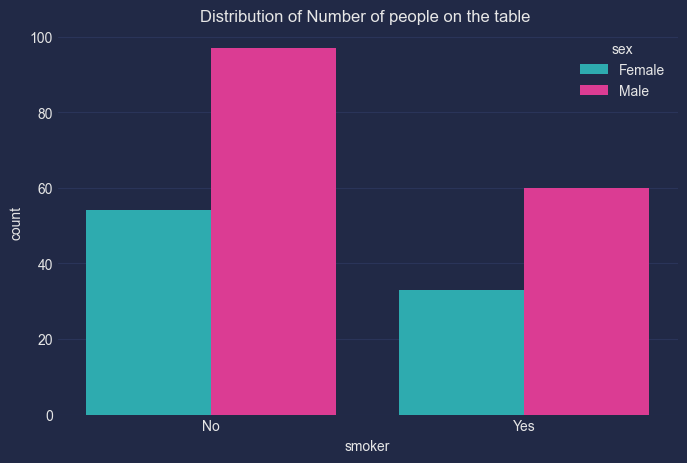

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df, x = 'smoker', hue = 'sex')
plt.title("Distribution of Number of people on the table ")
plt.plot()

[]

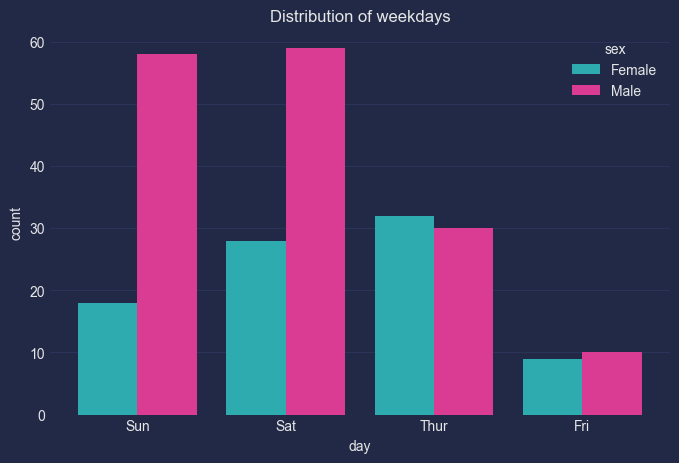

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(df, x = 'day', hue = 'sex')
plt.title("Distribution of weekdays")
plt.plot()

[]

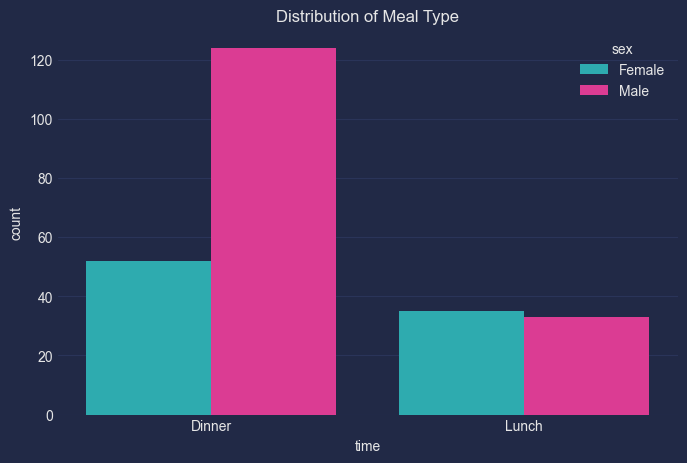

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(df, x = 'time', hue = 'sex')
plt.title("Distribution of Meal Type")
plt.plot()

In [16]:
df.groupby(['day', 'sex']).time.value_counts()

day   sex     time  
Fri   Female  Dinner     5
              Lunch      4
      Male    Dinner     7
              Lunch      3
Sat   Female  Dinner    28
      Male    Dinner    59
Sun   Female  Dinner    18
      Male    Dinner    58
Thur  Female  Lunch     31
              Dinner     1
      Male    Lunch     30
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

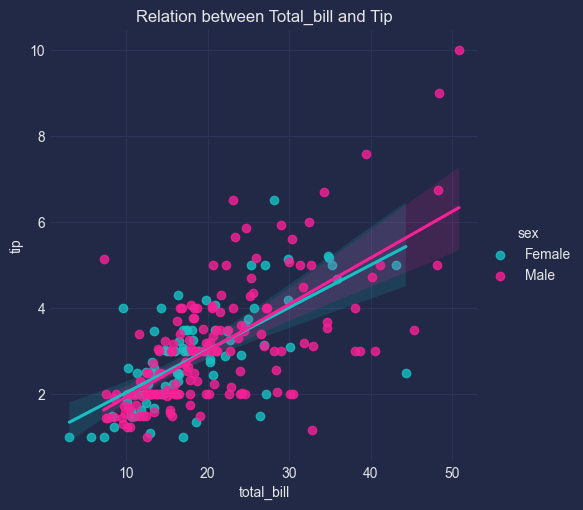

In [17]:
plt.figure(figsize = (12, 6))
sns.lmplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex')
plt.title("Relation between Total_bill and Tip")
plt.show()

<Figure size 1200x600 with 0 Axes>

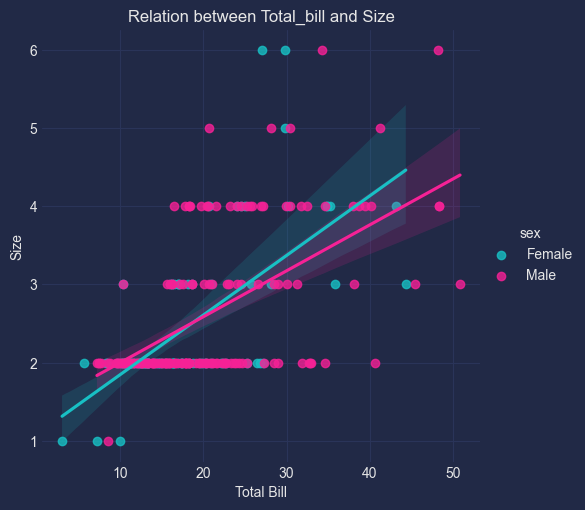

In [18]:
plt.figure(figsize = (12, 6))
sns.lmplot(data = df, x = 'total_bill', y = 'size', hue = 'sex')
plt.xlabel("Total Bill")
plt.ylabel("Size")
plt.title("Relation between Total_bill and Size")
plt.show()

In [19]:
df.groupby('sex').agg({"total_bill" : ['sum', 'mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
              sum       mean     sum      mean
sex                                           
Female    1570.95  18.056897  246.51  2.833448
Male      3256.82  20.744076  485.07  3.089618

In [20]:
df.groupby('smoker').agg({"total_bill" : ['sum', 'mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
              sum       mean     sum      mean
smoker                                        
No        2897.43  19.188278  451.77  2.991854
Yes       1930.34  20.756344  279.81  3.008710

In [21]:
df.groupby('day').agg({"total_bill" : ['sum', 'mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
            sum       mean     sum      mean
day                                         
Fri      325.88  17.151579   51.96  2.734737
Sat     1778.40  20.441379  260.40  2.993103
Sun     1627.16  21.410000  247.39  3.255132
Thur    1096.33  17.682742  171.83  2.771452

In [22]:
df.groupby('time').agg({"total_bill" : ['sum', 'mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
              sum       mean     sum      mean
time                                          
Dinner    3660.30  20.797159  546.07  3.102670
Lunch     1167.47  17.168676  185.51  2.728088

In [23]:
df.groupby(['sex', 'smoker']).agg({"total_bill" : ['sum','mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
                     sum       mean     sum      mean
sex    smoker                                        
Female No         977.68  18.105185  149.77  2.773519
       Yes        593.27  17.977879   96.74  2.931515
Male   No        1919.75  19.791237  302.00  3.113402
       Yes       1337.07  22.284500  183.07  3.051167

In [24]:
df.groupby(['sex', 'day']).agg({"total_bill": ["sum", "mean"], "tip": ["sum", "mean"]})

total_bill                tip          
                   sum       mean     sum      mean
sex    day                                         
Female Fri      127.31  14.145556   25.03  2.781111
       Sat      551.05  19.680357   78.45  2.801786
       Sun      357.70  19.872222   60.61  3.367222
       Thur     534.89  16.715312   82.42  2.575625
Male   Fri      198.57  19.857000   26.93  2.693000
       Sat     1227.35  20.802542  181.95  3.083898
       Sun     1269.46  21.887241  186.78  3.220345
       Thur     561.44  18.714667   89.41  2.980333

In [25]:
df.groupby(['sex', 'time']).agg({"total_bill" : ['sum', 'mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
                     sum       mean     sum      mean
sex    time                                          
Female Dinner     999.08  19.213077  156.11  3.002115
       Lunch      571.87  16.339143   90.40  2.582857
Male   Dinner    2661.22  21.461452  389.96  3.144839
       Lunch      595.60  18.048485   95.11  2.882121

In [26]:
df.groupby(['sex', 'size']).agg({"total_bill" : ['sum', 'mean'], "tip" : ['sum', 'mean']})

total_bill                tip          
                   sum       mean     sum      mean
sex    size                                        
Female 1         20.39   6.796667    3.83  1.276667
       2        889.69  15.339483  146.65  2.528448
       3        301.66  21.547143   45.50  3.250000
       4        272.51  30.278889   36.19  4.021111
       5         29.85  29.850000    5.14  5.140000
       6         56.85  28.425000    9.20  4.600000
Male   1          8.58   8.580000    1.92  1.920000
       2       1676.20  17.104082  256.19  2.614184
       3        582.89  24.287083   83.44  3.476667
       4        786.19  28.078214  116.82  4.172143
       5        120.49  30.122500   15.00  3.750000
       6         82.47  41.235000   11.70  5.850000

In [27]:
df['tip_percentage'] = (df['tip']/df['total_bill'])*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [28]:
df['sex'] = df['sex'].map({'Female' : 0, 'Male' : 1})
df['smoker'] = df['smoker'].map({'No' : 0, 'Yes' : 1})
df['day'] = df['day'].map({'Thur' : 0, 'Fri' : 1, 'Sat' : 2, 'Sun' : 3})
df['time'] = df['time'].map({'Lunch' : 0, 'Dinner' : 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,0,0,3,1,2,5.944673
1,10.34,1.66,1,0,3,1,3,16.054159
2,21.01,3.50,1,0,3,1,3,16.658734
3,23.68,3.31,1,0,3,1,2,13.978041
4,24.59,3.61,0,0,3,1,4,14.680765


In [29]:
X = df[["total_bill", "sex", "smoker", "day", "time", "size", "tip_percentage"]]
y = df["tip"]

In [32]:
for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

VIF for total_bill : 10.315222689926316
VIF for sex : 2.8835469568275762
VIF for smoker : 1.7425223473564129
VIF for day : 14.625804882493927
VIF for time : 15.549948576396334
VIF for size : 12.524187194549699
VIF for tip_percentage : 4.678945117145321


In [33]:
X = df[["total_bill", "sex", "smoker","time", "tip_percentage"]]
y = df["tip"]

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

VIF for total_bill : 4.2541084620469825
VIF for sex : 2.847422886455343
VIF for smoker : 1.6284244251530389
VIF for time : 3.702950310936566
VIF for tip_percentage : 3.607528192778895


In [34]:
df1 = df.drop(columns = ['day', 'size'], axis = 1)

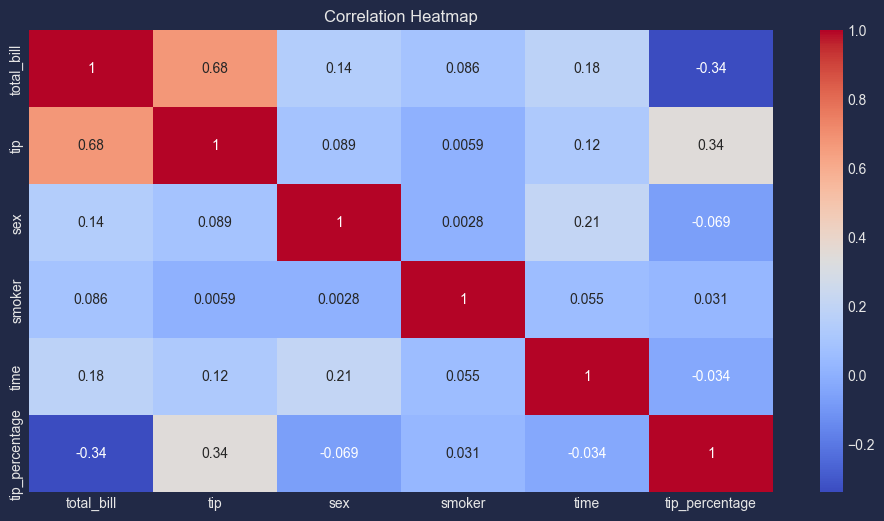

In [35]:
corr = df1.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor
importances = RandomForestRegressor().fit(df1.drop('tip', axis = 1), df['tip']).feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df1.drop('tip', axis = 1).columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
print(feature_importance_df)

          Feature  Importance
0      total_bill    0.610791
4  tip_percentage    0.382740
2          smoker    0.002496
1             sex    0.002338
3            time    0.001636


In [37]:
X = df[["total_bill", "sex", "smoker","time", "tip_percentage"]]
y = df["tip"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_lr_pred)}")
print(f"R-squared: {r2_score(y_test, y_lr_pred)}")

MSE: 0.23947327451939143
R-squared: 0.8084169885773446


In [40]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_dt_pred)}")
print(f"R-squared: {r2_score(y_test, y_dt_pred)}")

MSE: 0.3483163265306123
R-squared: 0.7213405508471131


In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_rf_pred)}")
R2 = r2_score(y_test, y_rf_pred)
print(f"R-squared: {r2_score(y_test, y_rf_pred)}")

MSE: 0.16287421387755066
R-squared: 0.8696976418751393


In [42]:
df1['tip_pred'] = rf_model.predict(X)

In [43]:
df1['residuals'] = df1['tip'] - df1['tip_pred']
df1.head()

,total_bill,tip,sex,smoker,time,tip_percentage,tip_pred,residuals
0,16.99,1.01,0,0,1,5.944673,1.2289,-0.2189
1,10.34,1.66,1,0,1,16.054159,1.6656,-0.0056
2,21.01,3.50,1,0,1,16.658734,3.4689,0.0311
3,23.68,3.31,1,0,1,13.978041,3.3475,-0.0375
4,24.59,3.61,0,0,1,14.680765,3.6311,-0.0211


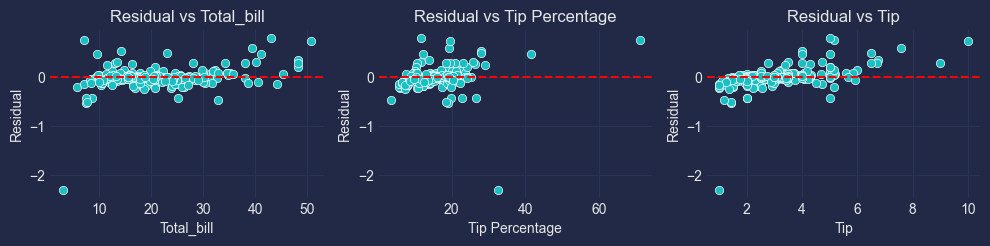

In [44]:
plt.figure(figsize = (12, 10))

plt.subplot(4,3,1)
sns.scatterplot(df1, x = 'total_bill', y = 'residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Total_bill')
plt.xlabel("Total_bill")
plt.ylabel("Residual")

plt.subplot(4,3,2)
sns.scatterplot(df1, x = 'tip_percentage', y = 'residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Tip Percentage')
plt.xlabel("Tip Percentage")
plt.ylabel("Residual")

plt.subplot(4,3,3)
sns.scatterplot(df1, x = 'tip', y = 'residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Tip')
plt.xlabel("Tip")
plt.ylabel("Residual")

plt.show()

In [47]:
durbin_watson(df1['residuals'].values)

1.9312515790134723

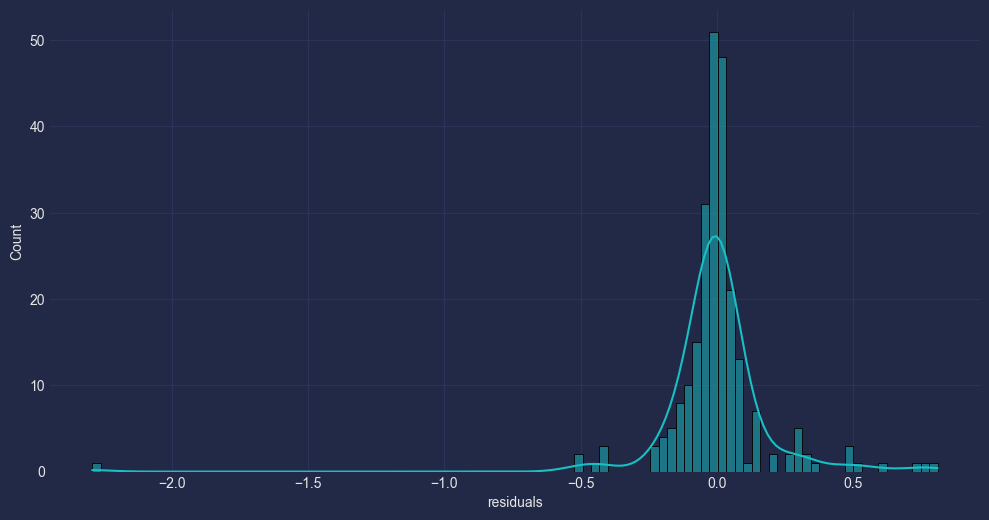

In [48]:
plt.figure(figsize = (12, 6))
sns.histplot(df1, x = 'residuals', bins = 100, kde = True)
plt.show()

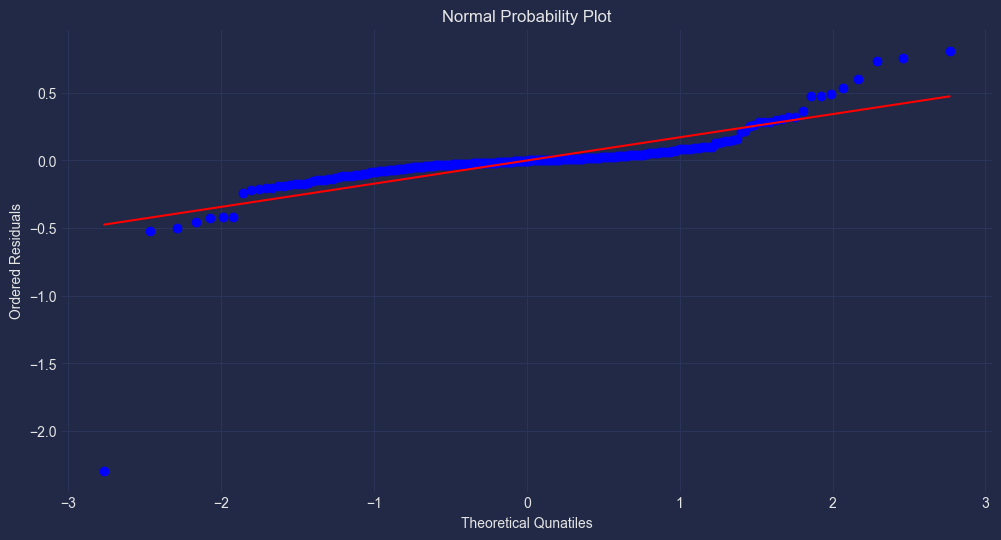

In [49]:
from scipy.stats import probplot
plt.figure(figsize = (12, 6))

probplot(df1['residuals'], dist = 'norm', plot = plt)
plt.title("Normal Probability Plot")
plt.xlabel("Theoretical Qunatiles")
plt.ylabel("Ordered Residuals")
plt.show()

In [50]:
dump(rf_model, '../ml_model/rf_model.joblib')

['../ml_model/rf_model.joblib']

In [51]:
model = load('../ml_model/rf_model.joblib')